# Building up to the Cooperative Mission Replanning Problem (CMRP)

This notebook shows us how to progressively build up to our full problem CMRP from multiple Traveling Salesman Problem(mTSP).

In [1]:
import os
from types import SimpleNamespace
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from graph_attention_replanner.config import (
    LogFileConfig,
    get_generator,
    get_env,
)

base_problem_setup_dict = {
    "num_task": 3,
    "num_agent": 3,
    "discretize_level": 2,
    "batch_size": 10,
    "seed": 0
}
base_problem_setup = SimpleNamespace(**base_problem_setup_dict)

# Training
Here, we try to train 2 models:
- One that can handle a single mTSP problem with 3 tasks and 3 agents.
- One that can handle a CMRP problem with 3 tasks and 3 agents, and discretization level of 2.

In [ ]:
os.system(f"python ../method/gat/train.py --num_task {base_problem_setup.num_task} --num_agent {base_problem_setup.num_agent} --num_node {base_problem_setup.num_task} --discretize_level 1 --mtsp_problem_type 1  --batch_size {base_problem_setup.batch_size} --train_data_size 1000 --val_data_size 100 --max_epochs 1 --seed {base_problem_setup.seed} --disable_wandb")

{'mtsp_problem_type': 1, 'num_node': 3, 'exact_num_node': False, 'num_task': 3, 'min_num_task': 3, 'max_num_task': 3, 'discretize_level': 1, 'min_discretize_level': 1, 'max_discretize_level': 1, 'num_agent': 3, 'min_num_agent': 3, 'max_num_agent': 3, 'batch_size': 10, 'device_id': 0, 'seed': 0, 'num_exp': 1, 'embed_dim': 128, 'num_encoder_layers': 8, 'num_heads': 4, 'train_data_size': 1000, 'val_data_size': 100, 'learning_rate': 1e-05, 'max_epochs': 1, 'algo': 'reinforce', 'disable_wandb': True}


Seed set to 0
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The BoundedTensorSpec has been deprecated and will be removed in v0.8. Please use Bounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedDiscreteTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedContinuousTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The CompositeSpec has been deprecated and will be removed in v0.8. Please use Composite instead.

┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃    ┃ Name                                   ┃ Type          ┃ Params ┃ Mode  ┃
┡━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0  │ env                                    │ MTSPEnv_Type1 │      0 │ train │
│ 1  │ policy                                 │ AttentionMod… │  1.7 M │ train │
│ 2  │ policy.encoder                         │ AttentionMod… │  1.6 M │ train │
│ 3  │ policy.encoder.init_embedding          │ MTSPInitEmbe… │    768 │ train │
│ 4  │ policy.encoder.net                     │ GraphAttenti… │  1.6 M │ train │
│ 5  │ policy.decoder                         │ AttentionMod… │  115 K │ train │
│ 6  │ policy.decoder.context_embedding       │ MTSPContext   │ 33.3 K │ train │
│ 7  │ policy.decoder.dynamic_embedding       │ StaticEmbedd… │      0 │ train │
│ 8  │ policy.decoder.pointer                 │ PointerAtten… │ 16.4 K │ train │
│ 9  │ policy.decoder.projec

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


Epoch 0: 100%|██████████| 100/100 [00:14<00:00,  6.68it/s, v_num=12, train/reward=-13.2, train/loss=6.430] 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 0: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s, v_num=12, train/reward=-13.2, train/loss=6.430, val/reward=-14.5]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 100/100 [00:16<00:00,  6.12it/s, v_num=12, train/reward=-13.2, train/loss=6.430, val/reward=-14.5]


0

In [6]:
os.system(f"python ../method/gat/train.py --num_task {base_problem_setup.num_task} --num_agent {base_problem_setup.num_agent} --discretize_level {base_problem_setup.discretize_level} --num_node {base_problem_setup.num_task*base_problem_setup.discretize_level} --mtsp_problem_type 5  --batch_size 10 --train_data_size 1000 --val_data_size 100 --max_epochs 1 --seed {base_problem_setup.seed} --disable_wandb")

{'mtsp_problem_type': 5, 'num_node': 6, 'exact_num_node': False, 'num_task': 3, 'min_num_task': 3, 'max_num_task': 3, 'discretize_level': 2, 'min_discretize_level': 2, 'max_discretize_level': 2, 'num_agent': 3, 'min_num_agent': 3, 'max_num_agent': 3, 'batch_size': 10, 'device_id': 0, 'seed': 0, 'num_exp': 1, 'embed_dim': 128, 'num_encoder_layers': 8, 'num_heads': 4, 'train_data_size': 1000, 'val_data_size': 100, 'learning_rate': 1e-05, 'max_epochs': 1, 'algo': 'reinforce', 'disable_wandb': True}


Seed set to 0
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The BoundedTensorSpec has been deprecated and will be removed in v0.8. Please use Bounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedDiscreteTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedContinuousTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The CompositeSpec has been deprecated and will be removed in v0.8. Please use Composite instead.

┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃    ┃ Name                                   ┃ Type          ┃ Params ┃ Mode  ┃
┡━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0  │ env                                    │ MTSPEnv_Type5 │      0 │ train │
│ 1  │ policy                                 │ AttentionMod… │  1.7 M │ train │
│ 2  │ policy.encoder                         │ AttentionMod… │  1.6 M │ train │
│ 3  │ policy.encoder.init_embedding          │ MTSPwithTLIn… │    896 │ train │
│ 4  │ policy.encoder.net                     │ GraphAttenti… │  1.6 M │ train │
│ 5  │ policy.decoder                         │ AttentionMod… │  115 K │ train │
│ 6  │ policy.decoder.context_embedding       │ MTSPContext   │ 33.3 K │ train │
│ 7  │ policy.decoder.dynamic_embedding       │ StaticEmbedd… │      0 │ train │
│ 8  │ policy.decoder.pointer                 │ PointerAtten… │ 16.4 K │ train │
│ 9  │ policy.decoder.projec

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Epoch 0:   0%|          | 0/100 [00:00<?, ?it/s]                           

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


Epoch 0: 100%|██████████| 100/100 [00:36<00:00,  2.71it/s, v_num=13, train/reward=-31.1, train/loss=-5.33]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 0: 100%|██████████| 100/100 [00:39<00:00,  2.51it/s, v_num=13, train/reward=-31.1, train/loss=-5.33, val/reward=-25.9]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 100/100 [00:44<00:00,  2.23it/s, v_num=13, train/reward=-31.1, train/loss=-5.33, val/reward=-25.9]


0

# Generate Data
Generate 1 set of data
- 10 instance of CMRPs/mTSP with 3 tasks, 3 agents, (and 2 discretization levels).

In [4]:
os.system(f"python ../run/gen_data.py --num_task {base_problem_setup.num_task} --num_agent {base_problem_setup.num_agent} --discretize_level {base_problem_setup.discretize_level} --num_node {base_problem_setup.num_task*base_problem_setup.discretize_level} --mtsp_problem_type 5  --batch_size {base_problem_setup.batch_size} --seed {base_problem_setup.seed}")

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The BoundedTensorSpec has been deprecated and will be removed in v0.8. Please use Bounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedDiscreteTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedContinuousTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The CompositeSpec has been deprecated and will be removed in v0.8. Please use Composite instead.
  warnings.wa

0

# Evaluation
We will evaulate the 2 models on the dataset we just generated.

In [21]:
# Evaluate the model that solve the problem instance as a mTSP

os.system(f"python ../method/gat/eval_gat.py --method_mtsp_problem_type 1 --method_seed {base_problem_setup.seed} --num_task {base_problem_setup.num_task} --num_agent {base_problem_setup.num_agent} --discretize_level {base_problem_setup.discretize_level} --num_node {base_problem_setup.num_task*base_problem_setup.discretize_level} --mtsp_problem_type 5 --batch_size {base_problem_setup.batch_size} --num_exp {base_problem_setup.batch_size} --seed {base_problem_setup.seed}")

Evaluating model from /Users/ekwan/graph-attention-replanner/cache/checkpoints/algo_reinforce/problem1_node3_task3to3_dislevel1to1_agent3to3_seed0_20250806094013/epoch_epoch=000.ckpt using data from /Users/ekwan/graph-attention-replanner/cache/data/general/problem5_node6_task3to3_dislevel2to2_agent3to3_seed0_bs10.npz and saving results at /Users/ekwan/graph-attention-replanner/cache/results/gat/problem1_node6_task3to3_dislevel2to2_agent3to3_bs10_exp1_dataseed0_methodseed0.csv ...


/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'env' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['env'])`.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'policy' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['policy'])`.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['baseline.baseline.policy.encoder.init_embedding.init_embed.weight', 'baseline.baseline.policy.encoder.init_embedding.init_embed.bias', 'baseline.baseline.policy.encoder.init_embedding.init_embed_depot.weight', 'baseline.baselin

------------Loaded Dataset from /Users/ekwan/graph-attention-replanner/cache/data/general/problem5_node6_task3to3_dislevel2to2_agent3to3_seed0_bs10.npz-------------



------------------------------------------
Avg Mission Time(s): 14.175271987915039 ± 3.8674778938293457. 
Standard Error: 1.22300386428833
Avg Wall Time(s): 0.0011822938919067382
------------------------------------------





0

In [8]:
# Evaluate the model that solve the problem instance as a CMRP

os.system(f"python ../method/gat/eval_gat.py --method_mtsp_problem_type 5 --method_seed {base_problem_setup.seed} --num_task {base_problem_setup.num_task} --num_agent {base_problem_setup.num_agent} --discretize_level {base_problem_setup.discretize_level} --num_node {base_problem_setup.num_task*base_problem_setup.discretize_level} --mtsp_problem_type 5 --batch_size {base_problem_setup.batch_size} --num_exp {base_problem_setup.batch_size} --seed {base_problem_setup.seed}")

Evaluating model from /Users/ekwan/graph-attention-replanner/cache/checkpoints/algo_reinforce/problem5_node6_task3to3_dislevel2to2_agent3to3_seed0_20250806094407/epoch_epoch=000.ckpt using data from /Users/ekwan/graph-attention-replanner/cache/data/general/problem5_node6_task3to3_dislevel2to2_agent3to3_seed0_bs10.npz and saving results at /Users/ekwan/graph-attention-replanner/cache/results/gat/problem5_node6_task3to3_dislevel2to2_agent3to3_bs10_exp1_dataseed0_methodseed0.csv ...


/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'env' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['env'])`.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'policy' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['policy'])`.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['baseline.baseline.policy.encoder.init_embedding.init_embed.weight', 'baseline.baseline.policy.encoder.init_embedding.init_embed.bias', 'baseline.baseline.policy.encoder.init_embedding.init_embed_depot.weight', 'baseline.baselin

------------Loaded Dataset from /Users/ekwan/graph-attention-replanner/cache/data/general/problem5_node6_task3to3_dislevel2to2_agent3to3_seed0_bs10.npz-------------



------------------------------------------
Avg Mission Time(s): 27.64629364013672 ± 7.331835746765137. 
Standard Error: 2.3185300827026367
Avg Wall Time(s): 0.0017493009567260743
------------------------------------------





0

# Visualize Results

In [2]:
def get_saved_data(setup, mtsp_problem_type=5, type="result"):
    num_node = setup.num_task * setup.discretize_level
    cfg = LogFileConfig(
            5,
            num_node,
            setup.num_task,
            setup.num_task,
            setup.discretize_level,
            setup.discretize_level,
            setup.num_agent,
            setup.num_agent,
            setup.batch_size,
            read_only=True,
        )
    if type == "result":
        result_path = cfg.get_result_logfilename(
            seed=setup.seed,
            method_seed=setup.seed,
            method="gat",
            format="csv",
            override_mtsp_problem_type=mtsp_problem_type,
        )
        return result_path
    elif type == "data":
        data_path = cfg.get_data_logfilename(
            seed=setup.seed, format="npz", override_mtsp_problem_type=5
        )
        return data_path
    else:
        raise ValueError("Invalid type specified. Use 'result' or 'data'.")

df_list = []
path = get_saved_data(base_problem_setup, mtsp_problem_type=5, type="result")
df = pd.read_csv(path)
df_list.append(df)

path = get_saved_data(base_problem_setup, mtsp_problem_type=1, type="result")
df = pd.read_csv(path)
df_list.append(df)

MERGED_DF = pd.concat(df_list, ignore_index=True)

# Group and aggregate
agg_df = MERGED_DF.groupby(["mtsp_problem_type"]).agg({
    "mission_time": lambda x: round(x.mean(), 2),
    "runtime": lambda x: round(x.mean(), 6)
})

agg_df

,mission_time,runtime
mtsp_problem_type,,
1,14.18,0.001182
5,27.65,0.001749


In [3]:
def visualize_action(setup, mtsp_problem_type=5, exp_num=1, ax=None):
    num_node = setup.num_task * setup.discretize_level
    generator = get_generator(5)(
        num_node=num_node,
        min_num_task=setup.num_task,
        max_num_task=setup.num_task,
        min_discretize_level=setup.discretize_level,
        max_discretize_level=setup.discretize_level,
        min_num_agent=setup.num_agent,
        max_num_agent=setup.num_agent,
        seed=setup.seed,
    )
    env = get_env(5)(generator)

    path = get_saved_data(setup, mtsp_problem_type, type="result")
    df = pd.read_csv(path).iloc[exp_num]
    action_str = df["tour"]
    action = np.array([int(x) for x in action_str.strip('[]').split(',')])

    # Convert action to non splitted version
    if mtsp_problem_type == 5:
        print(f"Action: {action}")
        genaction2specificaction = [0]
        for d in range(setup.discretize_level):
            for t in range(setup.num_task):
                genaction2specificaction.append(t+1)
        for a in range(setup.num_agent):
            offset = setup.num_task + 1
            genaction2specificaction.append(offset + a)
        print(f"genaction2specificaction: {genaction2specificaction}")
        action = np.array([genaction2specificaction[a] for a in action])
        print(f"Action: {action}")

    if mtsp_problem_type == 5:
        visualize_task_not_splitted = True
    else:
        visualize_task_not_splitted = False
    reward = df["mission_time"]
    path = get_saved_data(setup, mtsp_problem_type=mtsp_problem_type, type="data")
    td = env.load_data(path, batch_size=setup.batch_size)
    env.render(
        td[exp_num], action, reward=reward, visualize_task_not_splitted=visualize_task_not_splitted, ax=ax
    )

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The BoundedTensorSpec has been deprecated and will be removed in v0.8. Please use Bounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedDiscreteTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedContinuousTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The CompositeSpec has been deprecated and will be removed in v0.8. Please use Composite instead.
  warnings.wa

Action: [7 1 0 8 4 0 9 2 5 3 6 0]
genaction2specificaction: [0, 1, 2, 3, 1, 2, 3, 4, 5, 6]
Action: [4 1 0 5 1 0 6 2 2 3 3 0]


/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The BoundedTensorSpec has been deprecated and will be removed in v0.8. Please use Bounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedDiscreteTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedContinuousTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The CompositeSpec has been deprecated and will be removed in v0.8. Please use Composite instead.
  warnings.wa

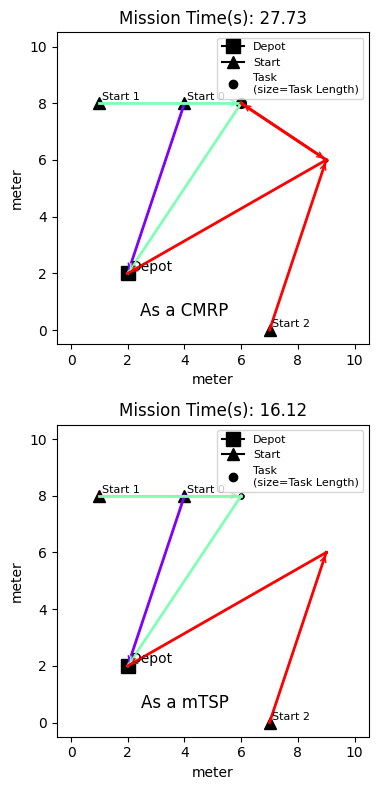

In [4]:
fig, ax = plt.subplots(2, figsize=(12,8))
ax[0].text(4, 0.5, "As a CMRP", fontsize=12, ha='center')
visualize_action(base_problem_setup, 5, ax=ax[0])
ax[1].text(4, 0.5, "As a mTSP", fontsize=12, ha='center')
visualize_action(base_problem_setup, 1, ax=ax[1])